In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [151]:
df=pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')
df

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1964,73060494,2650,1.0,1,686,9,4.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
4996,5686,92994390,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,All Downtown,Manhattan
4997,9679,7689663,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,All Downtown,Manhattan
4998,5188,62828354,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,All Midtown,Manhattan


In [152]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [173]:
df.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough', 'residual_predicted', 'residual_rent', 'predicted_rent'],
      dtype='object')

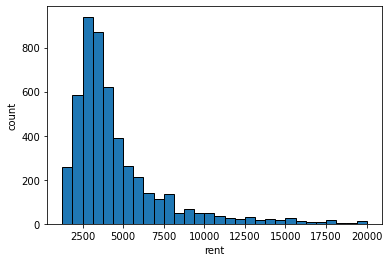

In [175]:
#Data exploration
#Summerize and plot a histogram for the target variable
plt.hist(df.rent,bins=30,edgecolor='black')
plt.xlabel('rent')
plt.ylabel('count')
plt.show()

In [188]:
#Identify which variable has the highest correlation
df.corr()['rent'].sort_values(ascending=False)

residual_predicted    1.000000
rent                  1.000000
residual_rent         1.000000
size_sqft             0.808784
predicted_rent        0.766035
bathrooms             0.733644
bedrooms              0.531200
floor                 0.272351
has_elevator          0.120822
has_doorman           0.099106
has_dishwasher        0.096631
has_washer_dryer      0.096136
has_gym               0.093737
has_roofdeck          0.081286
has_patio             0.058260
min_to_subway         0.003652
building_id          -0.001235
no_fee               -0.091769
building_age_yrs     -0.122302
rental_id            -0.142801
corr                       NaN
Name: rent, dtype: float64

<AxesSubplot:xlabel='rent', ylabel='size_sqft'>

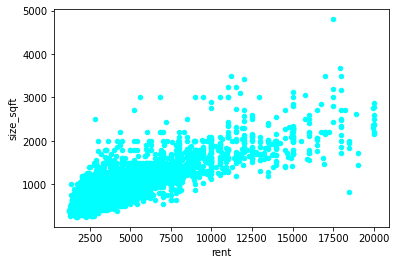

In [185]:
#Create a scatterplot of size_sqft , bathrooms , and floor .
df.plot.scatter('rent','size_sqft',color='cyan')

<AxesSubplot:xlabel='rent', ylabel='bathrooms'>

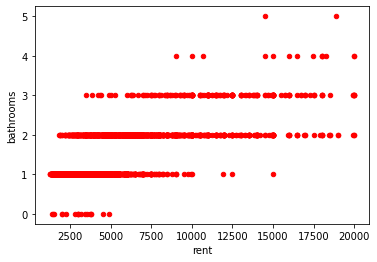

In [157]:
df.plot.scatter('rent','bathrooms',color='red')

<AxesSubplot:xlabel='rent', ylabel='floor'>

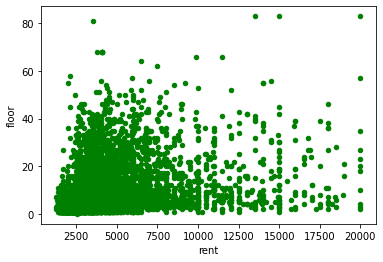

In [158]:
df.plot.scatter('rent','floor',color='green')

In [159]:
#Calculate the slope and intercept using the polyfit function
#Print the slope and intercept. How would you interpret these two numbers?
a,b=np.polyfit(df.size_sqft ,df.rent,1)
print('a=',round(a,3),'b=',round(b,3))

a= 5.384 b= -416.561


In [160]:
#Based on this data, how much would expect a 700 square foot apartment to cost?
print('c=', ((a*700)+b))


c= 3351.977210435991


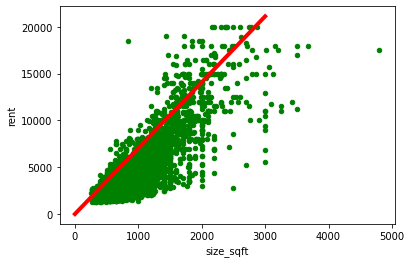

In [161]:
#Plot the fitted line along with the scatter plot.
df.plot.scatter('size_sqft','rent',color='green')
plt.plot([0,3000],[a,a*4000+b],color='red',linewidth=4)
plt.show()

In [162]:
#Create columns in the se_df dataframe for rent_predicted and rent_residual
#Does this appear to fall in line with the assumptions we've described?
df['residual_predicted']=a*df['rent']+b
df['residual_rent']=df['residual_predicted']-df['rent']
df['residual_rent']

0       10761.685057
1       49995.136533
2       12734.316696
3       19309.755491
4       20602.925120
            ...     
4995    11200.047644
4996    28844.141743
4997     7031.219448
4998    14816.538981
4999    19309.755491
Name: residual_rent, Length: 5000, dtype: float64

(array([ 839., 1811., 1014.,  477.,  251.,  184.,  113.,   85.,   49.,
          50.,   38.,   38.,   16.,   21.,   14.]),
 array([ 5062.97143519, 10542.50376418, 16022.03609316, 21501.56842215,
        26981.10075113, 32460.63308012, 37940.1654091 , 43419.69773809,
        48899.23006708, 54378.76239606, 59858.29472505, 65337.82705403,
        70817.35938302, 76296.891712  , 81776.42404099, 87255.95636998]),
 <BarContainer object of 15 artists>)

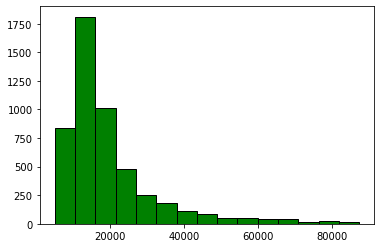

In [163]:
plt.hist(df.residual_rent,bins=15,color='green',edgecolor='black')

## using sklearn


In [164]:
lm=LinearRegression()
lm

LinearRegression()

In [165]:
x=['bedrooms', 'bathrooms', 'min_to_subway', 'floor',
'building_age_yrs', 'no_fee', 'has_roofdeck',
'has_washer_dryer', 'has_doorman', 'has_elevator',
'has_dishwasher', 'has_patio', 'has_gym']
X=df[x]
lm.fit(X,df.rent)

LinearRegression()

In [166]:
print('estimated intercept coefficient',lm.intercept_)
print('number of coeficients',len(lm.coef_))

estimated intercept coefficient -515.5040360811308
number of coeficients 13


In [167]:
a=pd.DataFrame(lm.coef_,index=x,columns=['Es.coeficients'])
a

,Es.coeficients
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_doorman,-41.004582
has_elevator,400.797299


In [168]:
df['predicted_rent']=lm.predict(X)
df[['rent','predicted_rent']]

,rent,predicted_rent
0,2550,2629.064883
1,11500,6479.317777
2,3000,3710.348635
3,4500,5994.052572
4,4795,3764.126005
...,...,...
4995,2650,2718.315156
4996,6675,7282.301113
4997,1699,2713.830709
4998,3475,3421.494926


In [169]:
#first five predicted prices
d=lm.predict(X)[0:5]
d

array([2629.06488344, 6479.31777692, 3710.34863476, 5994.05257186,
       3764.12600492])

Text(0, 0.5, 'Frequeny')

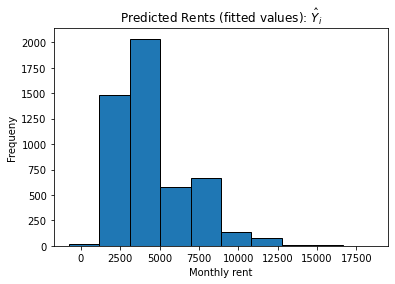

In [170]:
e=plt.hist(lm.predict(X),edgecolor='black')
plt.title('Predicted Rents (fitted values): $\hat{Y}_i$')
plt.xlabel('Monthly rent')
plt.ylabel('Frequeny')

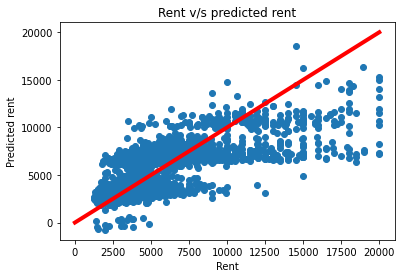

In [171]:
plt.scatter(df['rent'],lm.predict(X))
plt.xlabel('Rent')
plt.ylabel('Predicted rent')
plt.title('Rent v/s predicted rent')
plt.plot([0,20000],[0,20000],linewidth=4,color='red')

In [172]:
#Residual sum of squares
print('residual sum of squares',np.sum(df['rent']-lm.predict(X))**2)

residual sum of squares 3.5336573433114105e-17
